In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [9]:
# Define the Hindmarsh-Rose model
def hindmarsh_rose(t, y, I, r):
    x, y1, z = y
    dxdt = y1 - x**3 + 3*x**2 - z + I
    dydt = 1 - 5*x**2 - y1
    dzdt = r * (4 * (x + 1.6) - z)
    return [dxdt, dydt, dzdt]

# Function to run simulation for specific scenario
def run_simulation(I, r):
    initial_conditions = [-1.0, 2.0, 0.5]
    t_span = (0, 1500)
    t_eval = np.arange(0, 1500, 0.005)
    solution = solve_ivp(hindmarsh_rose, t_span, initial_conditions, args=(I, r), t_eval=t_eval, method='RK45')
    return solution.t, solution.y[0]



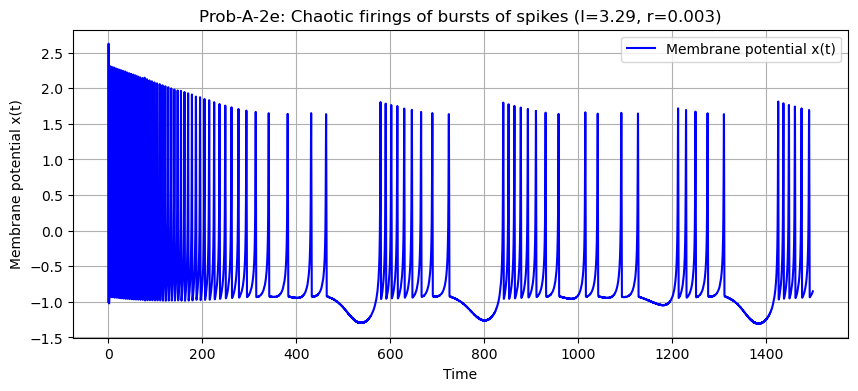

In [14]:
# Parameters for Prob-A-2e - Chaotic firings of bursts of spikes
I_e = 3.29
r_e = 0.003
description_e = 'Chaotic firings of bursts of spikes'

# Run the simulation for Prob-A-2e
t_e, x_t_e = run_simulation(I_e, r_e)

# Plotting the results for Prob-A-2e
plt.figure(figsize=(10, 4))
plt.plot(t_e, x_t_e, color='blue', label='Membrane potential x(t)')
plt.title(f'Prob-A-2e: {description_e} (I={I_e}, r={r_e})')
plt.xlabel('Time')
plt.ylabel('Membrane potential x(t)')
plt.grid(True)
plt.legend()
plt.savefig('Prob-A-2e.png')
plt.show()